[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farheenfab/AppliedText_CW/blob/main/CW1-analyze_dataset.ipynb)

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [2]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import nltk
import spacy


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fayazbadubhai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fayazbadubhai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fayazbadubhai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fayazbadubhai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

In [3]:
# get file from disk
filename = 'final_comments_df.csv'
final_comments_df=pd.read_csv(filename)

In [4]:
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_id,c_parentId,c_author,c_published_at,c_updated_at,c_like_count,c_text
0,Squid Game Korean Drama (2021),"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,MrBeast,2021-11-24T21:00:01Z,MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,UgwDhFNTCbfck5apuUJ4AaABAg,NaN,DoodleChaos,2021-11-24T22:07:54Z,2021-11-24T22:07:54Z,513598,"Huge props to the set designers, everything wa..."
1,Squid Game Korean Drama (2021),"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,MrBeast,2021-11-24T21:00:01Z,MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,Ugz2W0D6UB1nWoB6wG14AaABAg,NaN,WhitneyAvalon,2021-11-24T23:45:19Z,2021-11-24T23:45:19Z,63377,The sets in this are INCREDIBLE. Would love to...
2,Squid Game Korean Drama (2021),Squid Game stars take on the Dalgona Challenge...,TYd_pT9hZrM,Netflix K-Content,2021-10-09T09:00:10Z,They may have survived the dalgona challenge i...,https://i.ytimg.com/vi/TYd_pT9hZrM/default.jpg,Ugws5y7jVSnjKeSbbsB4AaABAg,NaN,KPOPLIFEbts2013,2021-10-09T09:41:49Z,2021-10-09T09:41:49Z,61021,"I can't believe, people actually DM'ed the man..."
3,Squid Game Korean Drama (2021),Squid Game | Official Trailer | Netflix,oqxAJKy0ii4,Netflix,2021-09-02T00:00:02Z,A Netflix Series | Squid Game Survive or die W...,https://i.ytimg.com/vi/oqxAJKy0ii4/default.jpg,UgyVSc5yR-lejpakJ2B4AaABAg,NaN,impostor8850,2021-09-28T22:31:47Z,2021-09-28T22:31:47Z,41708,this is one of the most bingeable shows on net...
4,Squid Game Korean Drama (2021),오징어 게임 3분 요약 [Squid Game 3 minutes summary],iRBQGFN-PEY,소맥거핀,2021-09-26T07:31:20Z,소맥거핀 #오징어게임 #애니메이션 #SquidGame 영상 내 스포일러를 주의해주세...,https://i.ytimg.com/vi/iRBQGFN-PEY/default.jpg,UgxQyRXosVG2Ld11usB4AaABAg,NaN,somacguffin,2021-09-26T07:33:55Z,2021-10-04T04:29:54Z,37055,\n!\n\n(Thank you for watching!)\n(Have a nice...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Squid Game Korean Drama (2021),"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,MrBeast,2021-11-24T21:00:01Z,MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,Ugy5838JZO0EjRUyMg94AaABAg,NaN,R.NComedy,2023-11-11T12:52:34Z,2023-11-11T12:52:34Z,130,"Huge props to the set designer , everything wa..."
496,Squid Game Korean Drama (2021),i need this clock - squid game,43zTkfMngLo,凍檸斌 lemontea,2021-10-08T18:25:07Z,NaN,https://i.ytimg.com/vi/43zTkfMngLo/default.jpg,Ugwwq3djPMatyDevsHN4AaABAg,NaN,justjenna6062,2021-10-12T10:33:36Z,2021-10-12T10:33:36Z,129,He was just peacefully sleeping and the doll j...
497,Squid Game Korean Drama (2021),SQUID GAMES: Honeycomb Challenge with Shinchan...,ZeOScUh9zz0,Live Engineer,2021-12-30T07:30:03Z,"Hello friends, I do some funny commentary on s...",https://i.ytimg.com/vi/ZeOScUh9zz0/default.jpg,UgyhG2qg1NxhZKPUgeh4AaABAg,NaN,sonaliparadise3591,2022-03-30T11:21:57Z,2022-03-30T11:21:57Z,129,Keep continue make a big video of this pls
498,Squid Game Korean Drama (2021),Red Light Green Light No Blood - Squid Game 1,Ww9HCin8ORs,PopMov,2021-10-06T20:56:52Z,I did this for a special person who wanted to ...,https://i.ytimg.com/vi/Ww9HCin8ORs/default.jpg,Ugz1SVpAyFAP-UjGe2x4AaABAg,NaN,yipeeeeeeeeeeeeeeeeeeeee9047,2021-10-22T04:33:16Z,2021-10-22T04:33:16Z,129,"Oh finally, i can watch squid game without bei..."


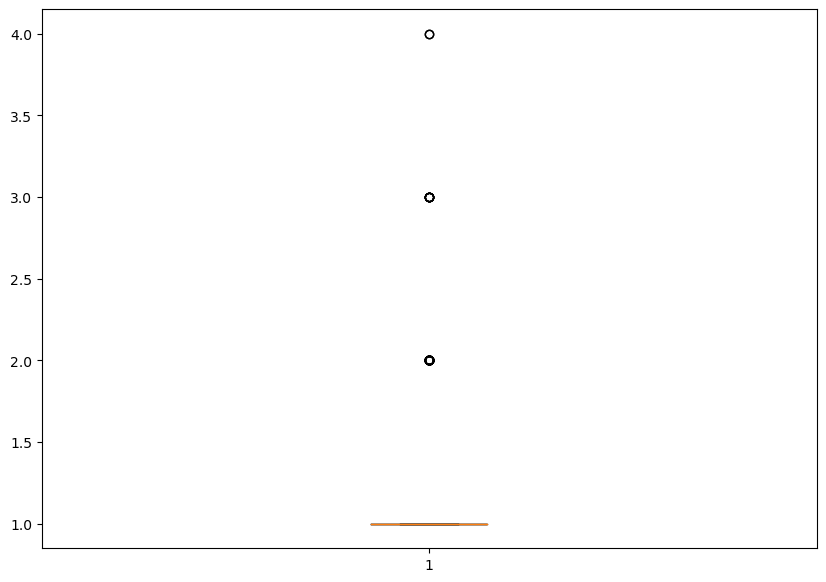

In [5]:
import matplotlib.pyplot as plt

data = final_comments_df['c_like_count'].value_counts()
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)
plt.show()


In [6]:
# number of comments per product 
final_comments_df.groupby('product').size().reset_index(name='counts')

,product,counts
0,Squid Game Korean Drama (2021),500


In [7]:
# product 0 is generated due to how I handled videos with comments disabled
# remove comments according to like threshold
# this is done to make sure the comment are relevent 
like_threshold=1
final_comments_df=final_comments_df[final_comments_df['c_like_count'] >= like_threshold]
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_id,c_parentId,c_author,c_published_at,c_updated_at,c_like_count,c_text
0,Squid Game Korean Drama (2021),"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,MrBeast,2021-11-24T21:00:01Z,MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,UgwDhFNTCbfck5apuUJ4AaABAg,NaN,DoodleChaos,2021-11-24T22:07:54Z,2021-11-24T22:07:54Z,513598,"Huge props to the set designers, everything wa..."
1,Squid Game Korean Drama (2021),"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,MrBeast,2021-11-24T21:00:01Z,MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,Ugz2W0D6UB1nWoB6wG14AaABAg,NaN,WhitneyAvalon,2021-11-24T23:45:19Z,2021-11-24T23:45:19Z,63377,The sets in this are INCREDIBLE. Would love to...
2,Squid Game Korean Drama (2021),Squid Game stars take on the Dalgona Challenge...,TYd_pT9hZrM,Netflix K-Content,2021-10-09T09:00:10Z,They may have survived the dalgona challenge i...,https://i.ytimg.com/vi/TYd_pT9hZrM/default.jpg,Ugws5y7jVSnjKeSbbsB4AaABAg,NaN,KPOPLIFEbts2013,2021-10-09T09:41:49Z,2021-10-09T09:41:49Z,61021,"I can't believe, people actually DM'ed the man..."
3,Squid Game Korean Drama (2021),Squid Game | Official Trailer | Netflix,oqxAJKy0ii4,Netflix,2021-09-02T00:00:02Z,A Netflix Series | Squid Game Survive or die W...,https://i.ytimg.com/vi/oqxAJKy0ii4/default.jpg,UgyVSc5yR-lejpakJ2B4AaABAg,NaN,impostor8850,2021-09-28T22:31:47Z,2021-09-28T22:31:47Z,41708,this is one of the most bingeable shows on net...
4,Squid Game Korean Drama (2021),오징어 게임 3분 요약 [Squid Game 3 minutes summary],iRBQGFN-PEY,소맥거핀,2021-09-26T07:31:20Z,소맥거핀 #오징어게임 #애니메이션 #SquidGame 영상 내 스포일러를 주의해주세...,https://i.ytimg.com/vi/iRBQGFN-PEY/default.jpg,UgxQyRXosVG2Ld11usB4AaABAg,NaN,somacguffin,2021-09-26T07:33:55Z,2021-10-04T04:29:54Z,37055,\n!\n\n(Thank you for watching!)\n(Have a nice...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Squid Game Korean Drama (2021),"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,MrBeast,2021-11-24T21:00:01Z,MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,Ugy5838JZO0EjRUyMg94AaABAg,NaN,R.NComedy,2023-11-11T12:52:34Z,2023-11-11T12:52:34Z,130,"Huge props to the set designer , everything wa..."
496,Squid Game Korean Drama (2021),i need this clock - squid game,43zTkfMngLo,凍檸斌 lemontea,2021-10-08T18:25:07Z,NaN,https://i.ytimg.com/vi/43zTkfMngLo/default.jpg,Ugwwq3djPMatyDevsHN4AaABAg,NaN,justjenna6062,2021-10-12T10:33:36Z,2021-10-12T10:33:36Z,129,He was just peacefully sleeping and the doll j...
497,Squid Game Korean Drama (2021),SQUID GAMES: Honeycomb Challenge with Shinchan...,ZeOScUh9zz0,Live Engineer,2021-12-30T07:30:03Z,"Hello friends, I do some funny commentary on s...",https://i.ytimg.com/vi/ZeOScUh9zz0/default.jpg,UgyhG2qg1NxhZKPUgeh4AaABAg,NaN,sonaliparadise3591,2022-03-30T11:21:57Z,2022-03-30T11:21:57Z,129,Keep continue make a big video of this pls
498,Squid Game Korean Drama (2021),Red Light Green Light No Blood - Squid Game 1,Ww9HCin8ORs,PopMov,2021-10-06T20:56:52Z,I did this for a special person who wanted to ...,https://i.ytimg.com/vi/Ww9HCin8ORs/default.jpg,Ugz1SVpAyFAP-UjGe2x4AaABAg,NaN,yipeeeeeeeeeeeeeeeeeeeee9047,2021-10-22T04:33:16Z,2021-10-22T04:33:16Z,129,"Oh finally, i can watch squid game without bei..."


In [8]:
# number of comments remaining per product after filtering
final_comments_df.groupby('product').size().reset_index(name='counts')

,product,counts
0,Squid Game Korean Drama (2021),500


In [9]:
final_comments_df.groupby('v_title').size().reset_index(name='counts')


,v_title,counts
0,"$456,000 Squid Game In Real Life!",82
1,(PART 1) Ketika Terjebak Di Dalam Game Yang Me...,1
2,Evolution of Red light green light in squid game,1
3,IF SQUID GAME WAS A ROMANTIC K-DRAMA… 💔,1
4,Red Light Green Light No Blood - Squid Game 1,9
5,Red light green light 🤯 the death game ☠️ | Sq...,5
6,SQUID GAME (WHITENO1SE x OMIKI REMIX),1
7,SQUID GAME | RED LIGHT GREEN LIGHT SCENE,25
8,SQUID GAMES: Honeycomb Challenge with Shinchan...,7
9,Squid Game (2021) Explained in Hindi / Urdu | ...,59


In [10]:
# get sentiment
def analyze_sentiment(comment):
    try:
        analysis = TextBlob(comment)
        return analysis.sentiment.polarity
    except:
        return 0.0
# Textblob sentiment analysis used due to the size of the dataset
# apply sentiment analysis on comment text and store in new column of the dataframe
final_comments_df["c_blob_sentiment"] = final_comments_df['c_text'].apply(analyze_sentiment)
final_comments_df[['v_title','c_text','c_author','c_blob_sentiment']].sort_values('c_blob_sentiment')

,v_title,c_text,c_author,c_blob_sentiment
182,i need this clock - squid game,That’s absolutely terrifying and also genius.,cowplatter5320,-1.0
251,오징어 게임 3분 요약 [Squid Game 3 minutes summary],I could watch this 1000 times and it'd never g...,joaovickyy2727,-1.0
419,"$456,000 Squid Game In Real Life!",The fact that people tried to cancel him over ...,jimdpanimation,-1.0
52,Squid Game | Official Trailer | Netflix,I just can't... Just binged the show and it's ...,trinamoy111,-1.0
8,Squid Game Season 2 Teaser Trailer | Life is a...,This is insanely well done.,MashArtOfficial,-1.0
...,...,...,...,...
104,Squid Game Season 2 Teaser Trailer | Life is a...,It's really excellent,ENTERTAININGGAMECHANNEL,1.0
278,Squid Game (2021) Explained in Hindi / Urdu | ...,Ali's character was awesome,itsmedtkavita,1.0
277,Squid Game (2021) Explained in Hindi / Urdu | ...,This show was awesome literally finished in day,peoplewithcommoninterest3267,1.0
485,SQUID GAME (WHITENO1SE x OMIKI REMIX),Perfect Timing to the scenes and great mixing ...,pascalgro6934,1.0


In [11]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_id,c_parentId,c_author,c_published_at,c_updated_at,c_like_count,c_text,c_blob_sentiment
0,Squid Game Korean Drama (2021),"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,MrBeast,2021-11-24T21:00:01Z,MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,UgwDhFNTCbfck5apuUJ4AaABAg,NaN,DoodleChaos,2021-11-24T22:07:54Z,2021-11-24T22:07:54Z,513598,"Huge props to the set designers, everything wa...",0.500
1,Squid Game Korean Drama (2021),"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,MrBeast,2021-11-24T21:00:01Z,MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,Ugz2W0D6UB1nWoB6wG14AaABAg,NaN,WhitneyAvalon,2021-11-24T23:45:19Z,2021-11-24T23:45:19Z,63377,The sets in this are INCREDIBLE. Would love to...,0.675
2,Squid Game Korean Drama (2021),Squid Game stars take on the Dalgona Challenge...,TYd_pT9hZrM,Netflix K-Content,2021-10-09T09:00:10Z,They may have survived the dalgona challenge i...,https://i.ytimg.com/vi/TYd_pT9hZrM/default.jpg,Ugws5y7jVSnjKeSbbsB4AaABAg,NaN,KPOPLIFEbts2013,2021-10-09T09:41:49Z,2021-10-09T09:41:49Z,61021,"I can't believe, people actually DM'ed the man...",0.000
3,Squid Game Korean Drama (2021),Squid Game | Official Trailer | Netflix,oqxAJKy0ii4,Netflix,2021-09-02T00:00:02Z,A Netflix Series | Squid Game Survive or die W...,https://i.ytimg.com/vi/oqxAJKy0ii4/default.jpg,UgyVSc5yR-lejpakJ2B4AaABAg,NaN,impostor8850,2021-09-28T22:31:47Z,2021-09-28T22:31:47Z,41708,this is one of the most bingeable shows on net...,0.500
4,Squid Game Korean Drama (2021),오징어 게임 3분 요약 [Squid Game 3 minutes summary],iRBQGFN-PEY,소맥거핀,2021-09-26T07:31:20Z,소맥거핀 #오징어게임 #애니메이션 #SquidGame 영상 내 스포일러를 주의해주세...,https://i.ytimg.com/vi/iRBQGFN-PEY/default.jpg,UgxQyRXosVG2Ld11usB4AaABAg,NaN,somacguffin,2021-09-26T07:33:55Z,2021-10-04T04:29:54Z,37055,\n!\n\n(Thank you for watching!)\n(Have a nice...,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Squid Game Korean Drama (2021),"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,MrBeast,2021-11-24T21:00:01Z,MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,Ugy5838JZO0EjRUyMg94AaABAg,NaN,R.NComedy,2023-11-11T12:52:34Z,2023-11-11T12:52:34Z,130,"Huge props to the set designer , everything wa...",0.500
496,Squid Game Korean Drama (2021),i need this clock - squid game,43zTkfMngLo,凍檸斌 lemontea,2021-10-08T18:25:07Z,NaN,https://i.ytimg.com/vi/43zTkfMngLo/default.jpg,Ugwwq3djPMatyDevsHN4AaABAg,NaN,justjenna6062,2021-10-12T10:33:36Z,2021-10-12T10:33:36Z,129,He was just peacefully sleeping and the doll j...,0.525
497,Squid Game Korean Drama (2021),SQUID GAMES: Honeycomb Challenge with Shinchan...,ZeOScUh9zz0,Live Engineer,2021-12-30T07:30:03Z,"Hello friends, I do some funny commentary on s...",https://i.ytimg.com/vi/ZeOScUh9zz0/default.jpg,UgyhG2qg1NxhZKPUgeh4AaABAg,NaN,sonaliparadise3591,2022-03-30T11:21:57Z,2022-03-30T11:21:57Z,129,Keep continue make a big video of this pls,0.000
498,Squid Game Korean Drama (2021),Red Light Green Light No Blood - Squid Game 1,Ww9HCin8ORs,PopMov,2021-10-06T20:56:52Z,I did this for a special person who wanted to ...,https://i.ytimg.com/vi/Ww9HCin8ORs/default.jpg,Ugz1SVpAyFAP-UjGe2x4AaABAg,NaN,yipeeeeeeeeeeeeeeeeeeeee9047,2021-10-22T04:33:16Z,2021-10-22T04:33:16Z,129,"Oh finally, i can watch squid game without bei...",-0.200


Im not sure if even mapping is the correct choice but ill go with this for now

In [12]:
def map_sentiment(value):
    if value > 0:
        return "positive"
    elif value < 0:
        return "negative"
    else:
        return "neutral"
    
# apply sentiment analysis on comment text and store in new column of the dataframe
final_comments_df["c_sentiment"] = final_comments_df['c_blob_sentiment'].apply(map_sentiment)
final_comments_df[['v_videoId','c_text','c_blob_sentiment','c_sentiment']].sort_values('c_sentiment')
final_comments_df["c_sentiment"].value_counts()

c_sentiment
positive    320
negative    100
neutral      80
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X = final_comments_df['c_text'] 
y = final_comments_df['c_sentiment'] 
# create a 20% test 80% train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# product specific stopwords
product_tokens=np.concatenate([word_tokenize(product.lower()) for product in final_comments_df['product'].unique()])
# remove digits and any single character
product_tokens = [token for token in product_tokens if len(token) > 1 and not token.isdigit()]
product_tokens += ['drama', 'film', 'cinema', 'actor', 'actress', 'director', 'plot',
                         'scene', 'genre', 'subtitles', 'k-drama', 'kdrama', 'k-movie', 'television',
                         'episode', 'screenplay', 'script', 'cinematography', 'soundtrack',
                         'OST', 'character', 'plot twist', 'review', 'ratings', 'premiere',
                         'streaming', 'watchlist', 'subbed', 'dubbed', 'sequel', 'game', 'song',
                         'season', 'trailer', 'casting', 'fanbase', 'recommendation', 'goblin',
                         'viewer', 'critic', 'Korean', 'entertainment', 'watched', 'guardian',
                         'show', 'squid', 'watch', 'watching', 'acting', 'netflix', 'show',
                         'jojo', 'kim', 'hye', 'sun', 'yeong', 'end', 'start', 'like', 'oh', 'someone',
                         'people', 'girl', 'boy', 'man', 'women', 'woman', 'love', 'alarm', 'ring',
                         'application', 'technology', 'romance', 'relationship', 'friendship',
                         'emotion', 'heart', 'dating', 'app','feelings', 'confession', 'secret',
                         'school', 'ringing', 'notification','person','sunoh','year','feel','guy',
                         'sunho','everyone','hate','ending','know','end',
                         'heartache', 'crush','friend', 'friendship', 'romantic', 'triangle']

In [15]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


X = final_comments_df['c_text']
y = final_comments_df['c_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Processing
def preprocess_text(text):
    tokens = word_tokenize(text)
    # stopwords punctuation etc
    stop_words = set(stopwords.words('english'))
    stemmer = nltk.stem.SnowballStemmer('english')
    # stemmer = PorterStemmer()
    # split into tokens
    tokens = word_tokenize(text)
    # removes stopwords and numbers and stems from tokens makes sure its all lowercase too
    tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token.lower() not in stop_words and token.lower() not in product_tokens]
    return ' '.join(tokens)


In [16]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([
    ('preprocess', 
    TfidfVectorizer(preprocessor=preprocess_text,
                    norm='l2',
                    encoding='utf-8',
                    lowercase=True,
                    ngram_range=(1, 1),
                    max_df=0.8,
                    min_df=10,
                    binary=True,
                    max_features=500,
                    sublinear_tf=True)
    # CountVectorizer(preprocessor=preprocess_text,ngram_range=(1, 1))
     ), 
    ('classifier', LogisticRegression())
])

text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.33      0.06      0.11        16
     neutral       0.00      0.00      0.00        18
    positive       0.67      0.98      0.80        66

    accuracy                           0.66       100
   macro avg       0.33      0.35      0.30       100
weighted avg       0.50      0.66      0.54       100



/Users/fayazbadubhai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fayazbadubhai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fayazbadubhai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


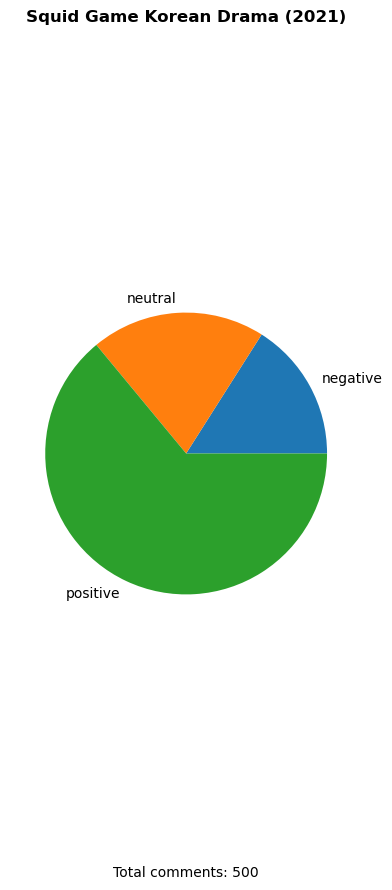

In [17]:
import matplotlib.pyplot as plt

products = sorted(final_comments_df['product'].unique())
sentiments = sorted(final_comments_df['c_sentiment'].unique())
count = 0

plt.figure(figsize=(10, 11))

for product in products:
    labels = sentiments

    val_counts = sorted(final_comments_df[final_comments_df['product'] == product]['c_sentiment'].value_counts())
    sizes = [val_count / sum(val_counts) for val_count in val_counts]

    plt.subplot(len(products)//2 + 1, 2, count % 6 + 1)
    plt.axis('equal')
    plt.title(product, fontweight='bold')

    plt.pie(sizes, labels=labels)
    bottom_text = f"Total comments: {len(final_comments_df[final_comments_df['product'] == product])}"
    plt.text(0.5, 0.0, bottom_text, size=10, ha="center", transform=plt.gca().transAxes)
    count += 1

plt.show()
# We can infer what the majority of people think about the product
# since these laptops are selected from the top 5 best laptops according to lapmag
# the sentiment is likely to be positive as it is here

/Users/fayazbadubhai/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/fayazbadubhai/anaconda3/lib/python3.11/site-packages/wordcloud/stopwords' mode='r' encoding='UTF-8'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


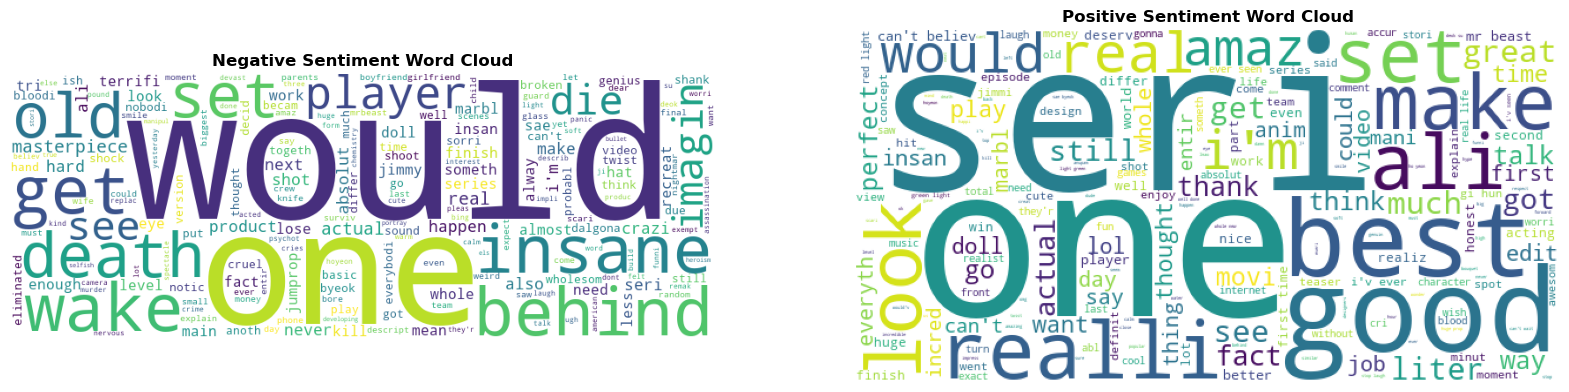

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_comments = final_comments_df[final_comments_df['c_sentiment'] == 'positive']['c_text']
negative_comments = final_comments_df[final_comments_df['c_sentiment'] == 'negative']['c_text']

stop_words = set(stopwords.words('english')).union(product_tokens)
# apply stemming to stop words
stemmer = nltk.stem.SnowballStemmer('english')
stop_words_stemmed = set([stemmer.stem(word) for word in stop_words])

positive_comments_stemmed = [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in positive_comments]

negative_comments_stemmed = [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in negative_comments]

wordcloud_positive = WordCloud(width=600, height=300, background_color='white',
                               stopwords=stop_words_stemmed)\
                                .generate(' '.join(positive_comments_stemmed))
wordcloud_negative = WordCloud(width=800, height=300, background_color='white',
                               stopwords=stop_words_stemmed)\
                                .generate(' '.join(negative_comments_stemmed))



plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Negative Sentiment Word Cloud', fontweight='bold')
plt.imshow(wordcloud_negative)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Positive Sentiment Word Cloud', fontweight='bold')
plt.imshow(wordcloud_positive)
plt.axis('off')

plt.show()
# shows words present in positive and negative sentiment text 

In [19]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

# text_clf = Pipeline([
#     ('vectorizer', TfidfVectorizer()),
#     ('classifier', MultinomialNB())
# ])

# parameters = {
#     'vectorizer': [TfidfVectorizer(),CountVectorizer()],
#     'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
#     'vectorizer__preprocessor':[preprocess_text],
#     'vectorizer__encoding':['utf-8'],
#     # 'vectorizer__max_df': [0.6, 0.9],
#     'vectorizer__min_df': [3],
#     # 'vectorizer__max_features': [1,2,3],
#     # 'vectorizer__norm': ['l1', 'l2'],
#     # 'vectorizer__smooth_idf': [False,True],
#     'vectorizer__binary':[False,True],
#     'vectorizer__lowercase':[False,True],
#     # 'vectorizer__sublinear_tf': [True, False],
#     # 'vectorizer__use_idf': [True, False],
#     'classifier': [
#                     MultinomialNB(),
#                     SVC(),
#                     LogisticRegression(),
#                     RandomForestClassifier()
#                    ],
# }

# grid_search = GridSearchCV(text_clf, parameters, cv=2, n_jobs=1)
# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# print(classification_report(y_test, y_pred))